In [3]:
import numpy as np
import os
import tqdm

%load_ext autoreload
%autoreload 2

In [4]:
def eval_from_scrach(gt_dir, det_dir):

    all_gt, all_det = [], []
    all_f = sorted(os.listdir(det_dir))
    for i, f in enumerate(all_f):
        gt_f = np.loadtxt(os.path.join(gt_dir, f), dtype=str).reshape(-1, 15)
        det_f = np.loadtxt(os.path.join(det_dir, f), dtype=str).reshape(-1, 16)

        gt = {}
        det = {}
        '''bbox'''
        gt['bbox'] = gt_f[:, 4:8].astype(np.float32)
        det['bbox'] = det_f[:, 4:8].astype(np.float32)

        '''alpha'''
        gt['alpha'] = gt_f[:, 3].astype(np.float32)
        det['alpha'] = det_f[:, 3].astype(np.float32)

        '''occluded'''
        gt['occluded'] = gt_f[:, 2].astype(np.float32)
        det['occluded'] = det_f[:, 2].astype(np.float32)

        '''truncated'''
        gt['truncated'] = gt_f[:, 1].astype(np.float32)
        det['truncated'] = det_f[:, 1].astype(np.float32)

        '''name'''
        gt['name'] = gt_f[:, 0]
        det['name'] = det_f[:, 0]

        '''location'''
        gt['location'] = gt_f[:, 11:14].astype(np.float32)
        det['location'] = det_f[:, 11:14].astype(np.float32)

        '''dimensions, convert hwl to lhw'''
        gt['dimensions'] = gt_f[:, [10, 8, 9]].astype(np.float32)
        det['dimensions'] = det_f[:, [10, 8, 9]].astype(np.float32)

        '''rotation_y'''
        gt['rotation_y'] = gt_f[:, 14].astype(np.float32)
        det['rotation_y'] = det_f[:, 14].astype(np.float32)

        '''score'''
        det['score'] = det_f[:, 15].astype(np.float32)

        all_gt.append(gt)
        all_det.append(det)
        
    # all_gt: list(3769), each label is a dict
    # {'bbox': array([[599.41, 156.4 , 629.75, 189.25],
    #        [387.63, 181.54, 423.81, 203.12],
    #        [559.62, 175.83, 575.4 , 183.15]], dtype=float32),
    # 'alpha': array([-1.57, -1.57, -1.57], dtype=float32),
    # 'occluded': array([0., 0., 0.], dtype=float32),
    # ...}
    return all_det, all_gt

In [1]:
eval_dir = "/home/a/DID-M3D/tmp_test/aug-mdga-loss-1/checkpoint_epoch_150/"

In [63]:
import pickle
with open(os.path.join(eval_dir, "all_det.pkl"), "rb") as f:
    all_det = pickle.load(f)
with open(os.path.join(eval_dir, "all_gt.pkl"), "rb") as f:
    all_gt = pickle.load(f)

In [5]:


all_det, all_gt =  eval_from_scrach(
        "/mnt/e/DataSet/kitti/training/label_2",
        os.path.join(eval_dir, "data")
    )


with open(os.path.join(eval_dir, "all_det.pkl"), "wb") as f:
    pickle.dump(all_det, f)
with open(os.path.join(eval_dir, "all_gt.pkl"), "wb") as f:
    pickle.dump(all_gt, f)


FileNotFoundError: [Errno 2] No such file or directory: '/home/a/DID-M3D/tmp_test/aug-mdga-loss-1/checkpoint_epoch_150/data'

In [64]:
MAX_DIS = 8
match_list = []
for dt, gt in zip(all_det, all_gt):
    pair = []
    n, m = dt['location'].shape[0], gt['location'].shape[0]
    for i in range(n):
        min_dist = np.inf
        matched_gt_idx = None
        for j in range(m):
            if gt['name'][j] == 'Car':
                dis = np.linalg.norm(dt['location'][i] - gt['location'][j])
                if dis < min_dist:
                    min_dist = dis
                    matched_gt_idx = j
        if min_dist < MAX_DIS:
            pair.append((i, matched_gt_idx))
    match_list.append(pair)

In [65]:
match_list

[[],
 [(0, 1)],
 [(0, 0), (1, 1)],
 [],
 [(0, 2), (1, 3), (2, 1)],
 [(0, 1), (1, 5), (2, 4), (3, 3), (4, 4), (5, 2), (6, 4)],
 [],
 [(0, 1)],
 [(0, 0)],
 [(0, 5), (1, 4), (2, 1), (3, 7), (4, 6), (5, 2)],
 [],
 [(0, 0), (1, 1)],
 [(0, 3), (1, 1), (2, 2), (3, 2), (4, 5), (5, 2)],
 [],
 [],
 [(0, 4), (1, 1), (2, 2), (3, 0)],
 [(0, 1)],
 [(0, 1), (1, 2), (2, 0)],
 [(0, 0), (1, 2), (2, 2)],
 [(0, 3), (1, 2), (2, 1), (3, 0), (4, 5), (5, 4)],
 [(0, 0)],
 [(0, 0)],
 [(0, 4), (1, 2), (2, 0), (3, 1), (4, 6)],
 [],
 [(0, 0), (1, 1), (2, 3)],
 [(0, 5), (1, 0), (2, 1), (4, 0), (6, 2)],
 [(0, 3), (1, 5), (2, 2), (3, 1), (4, 4), (5, 6), (7, 6)],
 [],
 [(0, 2), (1, 3), (2, 0), (3, 1)],
 [(0, 3), (1, 2)],
 [(0, 0), (1, 1), (2, 2)],
 [(0, 0), (2, 1)],
 [],
 [(0, 1), (1, 1)],
 [],
 [(0, 0)],
 [(0, 1), (1, 2), (2, 3)],
 [],
 [(0, 2), (1, 0), (2, 3), (3, 4), (4, 5)],
 [(0, 0)],
 [(0, 2), (1, 3), (2, 4), (3, 0), (4, 1)],
 [(0, 0)],
 [(0, 0), (1, 2), (2, 3), (3, 5)],
 [(0, 2)],
 [(0, 2), (1, 0), (2, 1), (3, 

In [66]:
gt_depth = []
dt_depth = []
score = []

for idx, pairs in enumerate(match_list):
    for i, j in pairs:
        gt_depth.append(all_gt[idx]['location'][j, 2])
        dt_depth.append(all_det[idx]['location'][i, 2])
        score.append(all_det[idx]['score'][i])

gt_depth = np.array(gt_depth)
dt_depth = np.array(dt_depth)
score = np.array(score)

In [67]:
np.abs(gt_depth - dt_depth)

array([1.7199974 , 0.16999817, 1.3800011 , ..., 6.379999  , 3.5200005 ,
       2.380001  ], dtype=float32)

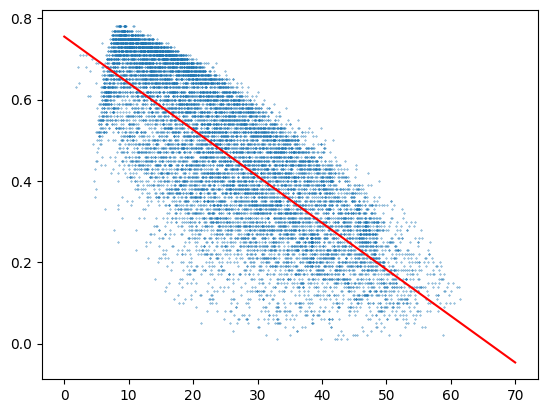

In [68]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(gt_depth.reshape(-1,1), score)
line_x = np.linspace(0, 70, 100)
line_y = model.predict(line_x[:, np.newaxis])

plt.scatter(gt_depth, score, s=0.1)
plt.plot(line_x, line_y, color='red', label='Line of Best Fit')

In [61]:
line_y_mdga = line_y

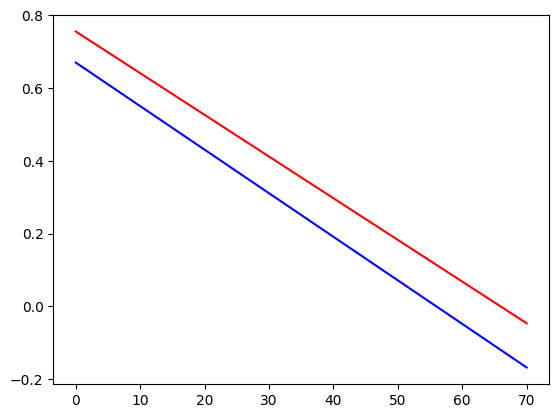

In [69]:

plt.plot(line_x, line_y, color='red', label='Line of Best Fit')
plt.plot(line_x, line_y_mdga, color='blue')